### Módulo 3 | PAIR PROGRAMMING | Regresión 2 | 26/05/22 | Almudena & Lara

In [55]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import sidetable as stb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [56]:
df = pd.read_csv("mdc.csv", encoding="latin-1", index_col= 0)
df.head(2)

,title,year,genre,runtime,mpa_rating,imdb_rating,imdb_votes,imdb_gross,director,stars,description,crit_consensus,tomato_meter,tomato_review,tom_aud_score,tom_ratings,entity,id
1,Captain America,1944,"Action, Adventure, Sci-Fi",244,Approved,5.5,844,0,Elmer Clifton,"Elmer Clifton,Dick Purcell,Lorna Gray,Lionel A...",Superhero Captain America battles the evil for...,"Find one of these old serials, friend. They're...",0,1,82,250,MARVEL,1
2,Howard the Duck,1986,"Action, Adventure, Comedy",110,PG,4.7,44073,16300000,Willard Huyck,"Willard Huyck,Lea Thompson,Jeffrey Jones,Tim R...",A sarcastic humanoid duck is pulled from his h...,"While it has its moments, Howard the Duck suff...",13,78,38,50000,MARVEL,2


# Ejercicio 1
Realizar de nuevo el ajuste lineal con los mismos datos y parámetros utilizados en la lección anterior.


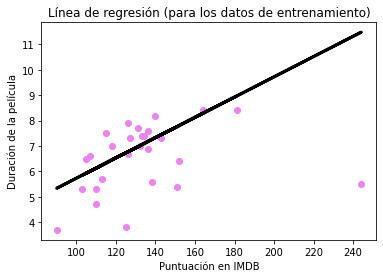

In [57]:
ind = df["runtime"].values.reshape(-1, 1)
dep = df["imdb_rating"].values.reshape(-1, 1)

ind_train, ind_test, dep_train, dep_test = train_test_split(ind, dep, test_size = 0.3)

LR = LinearRegression(n_jobs=-1)
LR.fit(ind_train, dep_train)

dep_predict_train = LR.predict(ind_train)
dep_prediction = LR.predict(ind_test)

plt.scatter(ind_test,dep_test,color="violet")  
plt.plot(ind_test, dep_prediction, color="black", linewidth=3) 
plt.title('Línea de regresión (para los datos de entrenamiento)')
plt.xlabel('Puntuación en IMDB')
plt.ylabel('Duración de la película')
plt.show()

# Ejercicio 2
Realizar un estudio de las asunciones de linealidad para los resultados obtenidos de nuestra regresión lineal simple.


**1. Linealidad**

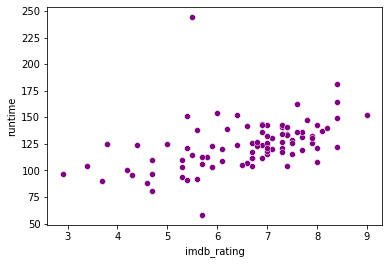

In [73]:
plt.figure()
sns.scatterplot(x = "imdb_rating", y = "runtime", data = df, color = "purple")
plt.show()

In [59]:
df[["imdb_rating", "runtime"]].corr()

,imdb_rating,runtime
imdb_rating,1.0000,0.4467
runtime,0.4467,1.0000


**2.Independencia**

In [60]:
residuos_dep = dep_test - dep_prediction

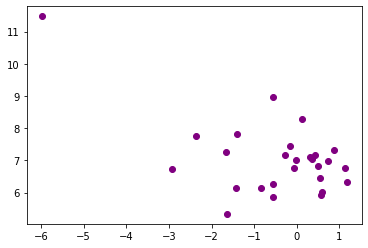

In [101]:
plt.figure()
plt.scatter(x = residuos_dep, y = dep_prediction, color = "purple")
plt.show()

**3.Homocedasticidad**

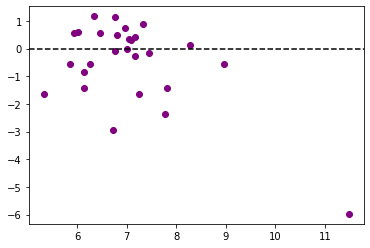

In [103]:
plt.figure()
plt.scatter(x = dep_prediction, y = residuos_dep, color = "purple")
plt.axline((float(min(dep_prediction)),0),(float(max(dep_prediction)),0),color="black",linestyle= '--') 
plt.show()

**4.Normalidad**

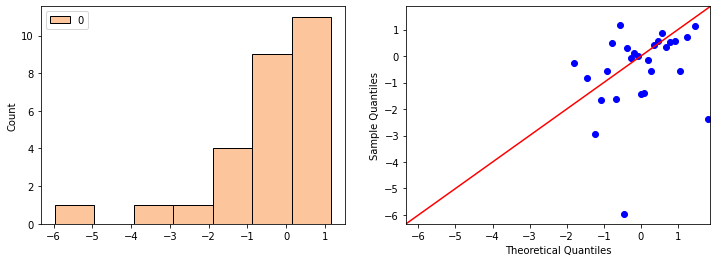

In [98]:
fig, ax = plt.subplots(1, 2, figsize = (12, 4))

sns.histplot(residuos_dep, ax = ax[0], palette= "Oranges")
sm.qqplot(residuos_dep, line = '45', ax = ax[1])
plt.show()

# Ejercicio 3
Interpretación de los resultados. Ahora interpreta los resultados obtenidos del estudio de las asunciones de linealidad del ajuste lineal simple y explica lo mejor posible los resultados obtenidos, así como si se cumple o se incumple algunas de las asunciones de linealidad.

> **Linealidad**
- Existencia de relación lineal entre dos variables. Comprobamos esta asución con un scatterplot entre la variable dependiente y la independendiente; y, a su vez, con la matriz de correlación de Pearson.
- Con estas comprobaciones observamos que existe una correlación positiva, pero no muy fuerte (en torno al +0'45, dentro del rango (-1, 1).

>**Independencia**
- Con esta condición queremos comprobar si los residuos (definidos como la diferencia entre los valores reales y los predichos para la variable dependiente) se comportan de manera aleatoria (es decir, independiente).
- Con el scatterplot realizado entre los residuos y los valores predichos, comprobamos esa distribución aleatoria de los valores.

>**Homocedastidad**
- Esta condición comprueba si la varianza de los residuos es constante. Realizamos una gráfica de scatterplot entre los valores predichos y los residuos (!!!!!!!!)

>**Normalidad**
- La última condición que se debe cumplir para que una regresión lineal sea válida es que los residuos de la variable dependiente se destribuyan de forma normal, con media 0.
- Con el gráfico QQPlot y un histograma vemos que, en términos generales, así ocurre. Aunque, como se venía dando, tenemos algunos datos que representan valores atípicos (outliers).